# Deep Learning with PyTorch


Author: [Anand Saha](http://teleported.in/)

### 2. Building a simple neural network

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

# Custom DataSet
from data import iris

### The Dataset and the challenge

![iris](data/iris.jpg)

The **Iris** flower, image source: [Wikimedia](https://en.wikipedia.org/wiki/Iris_(plant))


| sepal_length_cm | sepal_width_cm | petal_length_cm | petal_width_cm | class           |
|-----------------|----------------|-----------------|----------------|-----------------|
| 5.1             | 3.5            | 1.4             | 0.2            | Iris-setosa     |
| 7.0             | 3.2            | 4.7             | 1.4            | Iris-versicolor |
| 6.3             | 3.3            | 6.0             | 2.5            | Iris-virginica  |


* Total instances: 150 (we have separated 20% into validation set, rest into training set)
* Download: [Data Source](https://archive.ics.uci.edu/ml/datasets/iris)

### Let's do a head on the raw file

In [2]:
!head data/iris.data.txt

sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [3]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

**Print the module**

In [4]:
model = IrisNet(4, 100, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=3)
)


### Create the DataLoader

In [5]:
batch_size = 10
iris_data_file = 'data/iris.data.txt'

In [6]:
# Get the datasets
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# Create the dataloaders - for training and validation/testing
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


### Instantiate the network, the loss function and the optimizer

In [7]:
# Our model
net = IrisNet(4, 100, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)  

### Train it!

In [8]:
num_epochs = 200
train_loss = []

for epoch in range(num_epochs):
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items)
        classes = Variable(classes)
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients 
        # How did we do on the test set (the unseen set)
        
        if (i+1)%6 == 0:
            print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data[0]))

    train_loss.append(loss.data[0])
    

Epoch 1/200, Iteration 6/12, Loss: 1.0527
Epoch 1/200, Iteration 12/12, Loss: 1.2016
Epoch 2/200, Iteration 6/12, Loss: 1.0290
Epoch 2/200, Iteration 12/12, Loss: 1.0648
Epoch 3/200, Iteration 6/12, Loss: 1.0185
Epoch 3/200, Iteration 12/12, Loss: 1.0025
Epoch 4/200, Iteration 6/12, Loss: 0.9941
Epoch 4/200, Iteration 12/12, Loss: 1.0085
Epoch 5/200, Iteration 6/12, Loss: 1.0204
Epoch 5/200, Iteration 12/12, Loss: 0.9924
Epoch 6/200, Iteration 6/12, Loss: 0.9464
Epoch 6/200, Iteration 12/12, Loss: 0.9446
Epoch 7/200, Iteration 6/12, Loss: 0.9266
Epoch 7/200, Iteration 12/12, Loss: 0.9364
Epoch 8/200, Iteration 6/12, Loss: 0.8681
Epoch 8/200, Iteration 12/12, Loss: 0.8820
Epoch 9/200, Iteration 6/12, Loss: 1.0018
Epoch 9/200, Iteration 12/12, Loss: 0.8746
Epoch 10/200, Iteration 6/12, Loss: 0.8261
Epoch 10/200, Iteration 12/12, Loss: 0.8767
Epoch 11/200, Iteration 6/12, Loss: 0.8482
Epoch 11/200, Iteration 12/12, Loss: 0.8277
Epoch 12/200, Iteration 6/12, Loss: 0.8569
Epoch 12/200, Iter

Epoch 98/200, Iteration 6/12, Loss: 0.3614
Epoch 98/200, Iteration 12/12, Loss: 0.3368
Epoch 99/200, Iteration 6/12, Loss: 0.3142
Epoch 99/200, Iteration 12/12, Loss: 0.6012
Epoch 100/200, Iteration 6/12, Loss: 0.4684
Epoch 100/200, Iteration 12/12, Loss: 0.4907
Epoch 101/200, Iteration 6/12, Loss: 0.3494
Epoch 101/200, Iteration 12/12, Loss: 0.4717
Epoch 102/200, Iteration 6/12, Loss: 0.4514
Epoch 102/200, Iteration 12/12, Loss: 0.4384
Epoch 103/200, Iteration 6/12, Loss: 0.3807
Epoch 103/200, Iteration 12/12, Loss: 0.6112
Epoch 104/200, Iteration 6/12, Loss: 0.4774
Epoch 104/200, Iteration 12/12, Loss: 0.4727
Epoch 105/200, Iteration 6/12, Loss: 0.4009
Epoch 105/200, Iteration 12/12, Loss: 0.5038
Epoch 106/200, Iteration 6/12, Loss: 0.2968
Epoch 106/200, Iteration 12/12, Loss: 0.5158
Epoch 107/200, Iteration 6/12, Loss: 0.4530
Epoch 107/200, Iteration 12/12, Loss: 0.4236
Epoch 108/200, Iteration 6/12, Loss: 0.3468
Epoch 108/200, Iteration 12/12, Loss: 0.3006
Epoch 109/200, Iteration 

Epoch 194/200, Iteration 6/12, Loss: 0.2725
Epoch 194/200, Iteration 12/12, Loss: 0.3699
Epoch 195/200, Iteration 6/12, Loss: 0.3189
Epoch 195/200, Iteration 12/12, Loss: 0.2707
Epoch 196/200, Iteration 6/12, Loss: 0.3374
Epoch 196/200, Iteration 12/12, Loss: 0.3590
Epoch 197/200, Iteration 6/12, Loss: 0.3807
Epoch 197/200, Iteration 12/12, Loss: 0.2468
Epoch 198/200, Iteration 6/12, Loss: 0.2073
Epoch 198/200, Iteration 12/12, Loss: 0.4429
Epoch 199/200, Iteration 6/12, Loss: 0.4175
Epoch 199/200, Iteration 12/12, Loss: 0.3073
Epoch 200/200, Iteration 6/12, Loss: 0.2956
Epoch 200/200, Iteration 12/12, Loss: 0.4403


Plot loss vs iterations

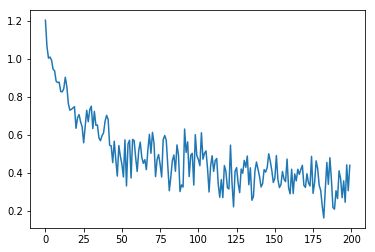

In [9]:
plt.plot(train_loss)

In [10]:
# Test the Model
correct = 0
total = 0
for items, classes in test_loader:
    
    items = Variable(items.type(torch.FloatTensor))
    classes = classes.type(torch.LongTensor)
    
    outputs = net(items)
    _, predicted = torch.max(outputs.data, 1)
    total += classes.size(0)
    correct += (predicted == classes).sum()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 100 %
